<a href="https://colab.research.google.com/github/amrendra1002/DS-ML/blob/master/DL_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tqdm import tqdm
import os
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from matplotlib import pyplot
import os

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir(r'/content/drive/My Drive/Data/archive (1).zip (Unzipped Files)/chest_xray')

In [ ]:
!ls

test   val    X_test.npy   Y.npy       Y_train.npy
train  X.npy  X_train.npy  Y_test.npy


In [ ]:
normal_images = []
for image in tqdm(os.listdir("train/NORMAL")):
    if image is not None:
        normal_images.append(image)


100%|██████████| 1334/1334 [00:00<00:00, 676647.91it/s]


In [ ]:
pnem_images = []
for image in tqdm(os.listdir("train/PNEUMONIA")):
    if image is not None:
        pnem_images.append(image)

100%|██████████| 3872/3872 [00:00<00:00, 1247529.97it/s]


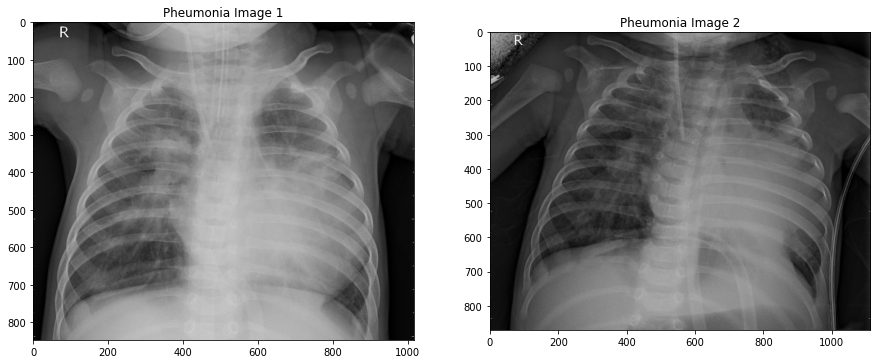

In [ ]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    pnem_img = load_img("train/PNEUMONIA" + "/" + pnem_images[i])
    ax[i].imshow(pnem_img)
    ax[i].set_title('Pheumonia Image ' + str(i+1))

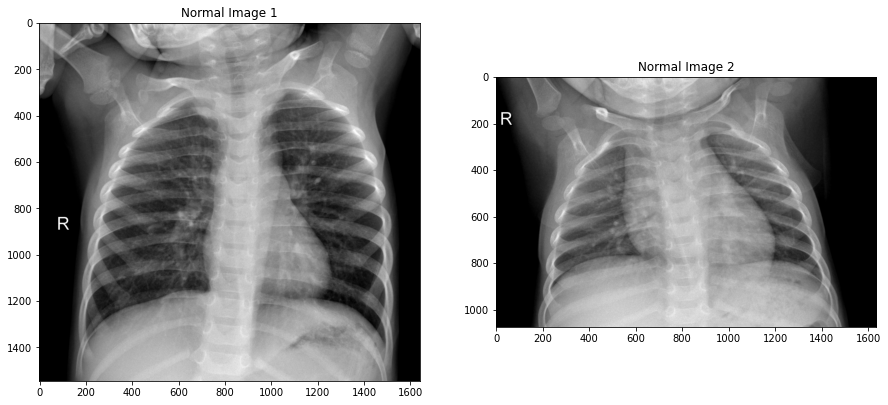

In [ ]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    normal_img = load_img("train/NORMAL" + "/" + normal_images[i])
    ax[i].imshow(normal_img)
    ax[i].set_title('Normal Image ' + str(i+1))

Text(0.5, 1.0, 'Width Shifted Pheumonia Image')

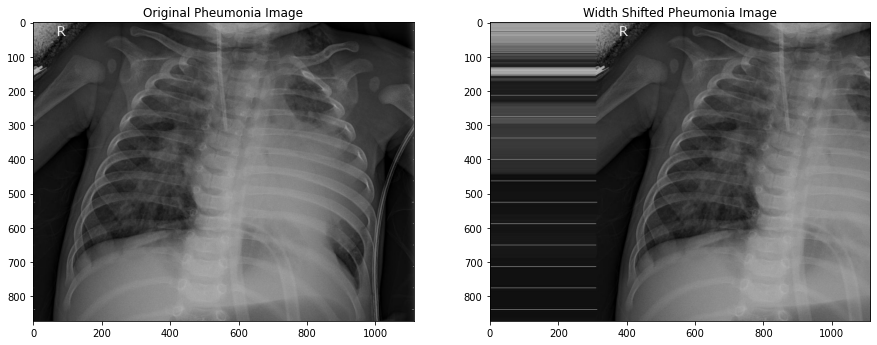

In [ ]:
#Increase rank of image from 3 to 4
pnem_img1 = np.expand_dims(pnem_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.3)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# generate batch of images

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Width Shifted Pheumonia Image')


Text(0.5, 1.0, 'Horizontal Flip Pheumonia Image')

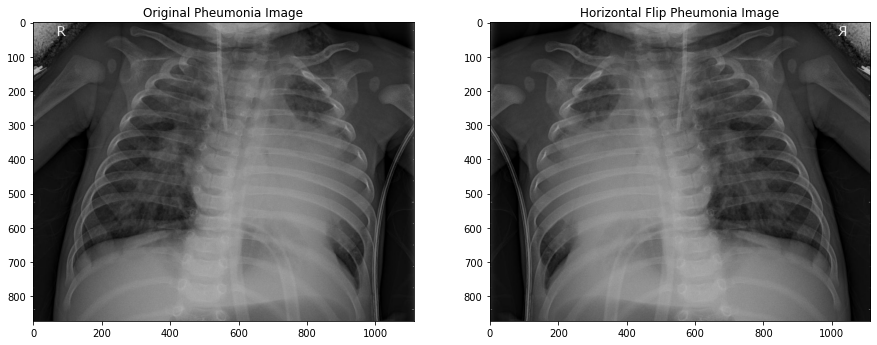

In [ ]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Pheumonia Image')

Text(0.5, 1.0, 'Width Shift Normal Image')

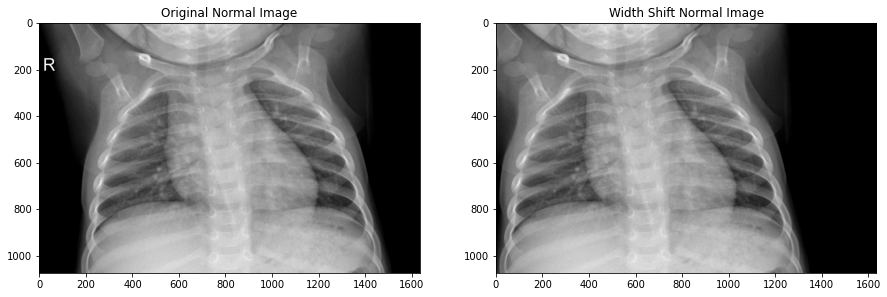

In [ ]:
#Increase rank of image from 3 to 4
normal_img1 = np.expand_dims(normal_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Width Shift Normal Image')

Text(0.5, 1.0, 'Horizontal Flip Normal Image')

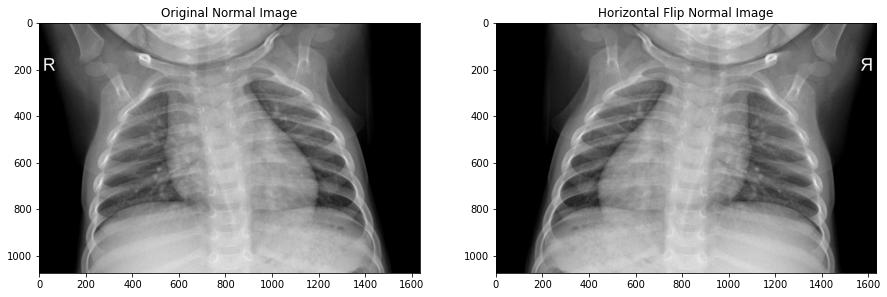

In [ ]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Normal Image')

In [ ]:
def load_images(dir):
  images = []
  i = 0
  #train_image = train_pneum_image.copy()
  for image1 in tqdm(os.listdir(dir)):
      img = load_img(dir + "/" + image1, target_size=(28,28,1), color_mode="grayscale")
      img = np.array(img)
      img = img/255
      images.append(img)
     # i = i+ 1
     # if i == 100:
     #   break
  return np.array(images)

In [ ]:
X_train_normal = load_images("train/NORMAL")
Y_train_normal = np.zeros(X_train_normal.shape[0])
X_train_pnem = load_images("train/PNEUMONIA")
Y_train_pnem = np.ones(X_train_pnem.shape[0])
X_test_normal = load_images("test/NORMAL")
Y_test_normal = np.zeros(X_test_normal.shape[0])
X_test_pnem = load_images("test/PNEUMONIA")
Y_test_pnem = np.ones(X_test_pnem.shape[0])

100%|██████████| 390/390 [01:45<00:00,  3.71it/s]


In [ ]:
Y = np.concatenate([Y_train_normal, Y_train_pnem, Y_test_normal, Y_test_pnem], axis=0)

In [ ]:
Y.shape

(5830,)

In [ ]:
#np.save('Y.npy', Y)    # .npy extension is added if not given
#Y = np.load('Y.npy')

In [ ]:
X = np.concatenate([X_train_normal, X_train_pnem, X_test_normal, X_test_pnem], axis=0)

In [ ]:
X.shape

(5830, 28, 28)

In [ ]:
#np.save('X.npy', X)    # .npy extension is added if not given
#X = np.load('X.npy')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 25, test_size = 0.2)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4664, 28, 28), (4664,), (1166, 28, 28), (1166,))

In [ ]:
x_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]).astype('float32')
x_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32')

In [ ]:
x_train.shape, x_test.shape

((4664, 784), (1166, 784))

# Choosing the layers, neurons, and optimisers:
Number of layers and nuerons in each layer are hyperparameters and the optimal value can be identified only throught experimentation. We tried different  options and set the below which gave the optimal accuracy. 512 neurons in the first layer is a good choice as out input size is 784.

We selected Adam as an optimiser. Adam performs a form of learning rate annealing with adaptive step-sizes. With the default value of base learning rate the model accuracy was flactuating so tried reducing the base learning rate and the value of 0.00001 was found optimal.

In [ ]:
#Create new models
def Create_and_train_model(epoch, batch_size, dropout):
  model = Sequential()
  model.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(x_train.shape[1],)))
  model.add(Dropout(dropout))
  model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(Dense(1,activation='sigmoid'))

  model.summary()

  base_learning_rate = 0.00001
  opt=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)

  model.compile(optimizer=opt, loss='binary_crossentropy',  metrics=['accuracy'])
  start = time.time()
  model.fit(x_train,Y_train,epochs=epoch,verbose=1, batch_size=batch_size, validation_data=(x_test,Y_test))
  stop = time.time()

  print("\n" + f"Training time: {stop - start}s")

  return model

In [ ]:
def plot_accuracy_loss(model):
  history = model.history
  # list all data in history
  #print(history.history.keys())
  # summarize history for accuracy
  pyplot.plot(history.history['accuracy'])
  pyplot.plot(history.history['val_accuracy'])
  pyplot.title('model accuracy')
  pyplot.ylabel('accuracy')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.show()
  # summarize history for loss
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.title('model loss')
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.show()

In [ ]:
def get_accuracy_metrics(model):
  Y_test_pred = model.predict_classes(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32'))
  print("Confusion Matrix")
  print(confusion_matrix(Y_test, Y_test_pred))
  print("\n" +"Classification Report")
  print(classification_report(Y_test, Y_test_pred))
  print("Accuracy")
  print(accuracy_score(Y_test, Y_test_pred))

In [ ]:
model1 = Create_and_train_model(100, 32, 0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 566,273
Trainable params: 566,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
146/146 [==============================] - 2s 6ms/step - loss: 1.7408 - accuracy: 0.6725 - val_loss: 1

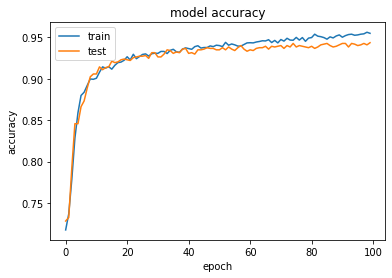

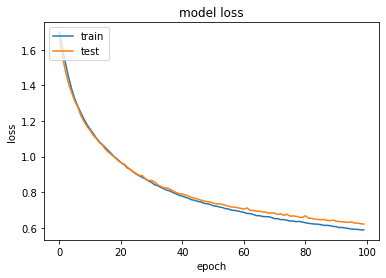

Confusion Matrix
[[277  40]
 [ 26 823]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       317
         1.0       0.95      0.97      0.96       849

    accuracy                           0.94      1166
   macro avg       0.93      0.92      0.93      1166
weighted avg       0.94      0.94      0.94      1166

Accuracy
0.9433962264150944


In [ ]:
plot_accuracy_loss(model1)
get_accuracy_metrics(model1)

In [ ]:
model2 = Create_and_train_model(100, 64, 0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 129       
Total params: 566,273
Trainable params: 566,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
73/73 [==============================] - 1s 7ms/step - loss: 1.7100 - accuracy: 0.7305 - val_loss: 1.6

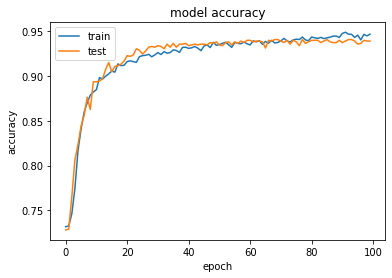

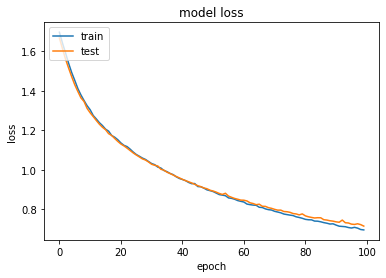

Confusion Matrix
[[275  42]
 [ 29 820]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       317
         1.0       0.95      0.97      0.96       849

    accuracy                           0.94      1166
   macro avg       0.93      0.92      0.92      1166
weighted avg       0.94      0.94      0.94      1166

Accuracy
0.9391080617495712


In [ ]:
plot_accuracy_loss(model2)
get_accuracy_metrics(model2)

In [ ]:
def Create_and_train_modelv1(epoch, batch_size, dropout):
  model = Sequential()
  model.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(x_train.shape[1],)))
  model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(Dropout(dropout))
  model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(Dense(1,activation='sigmoid'))

  model.summary()

  base_learning_rate = 0.00001
  opt=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)

  model.compile(optimizer=opt, loss='binary_crossentropy',  metrics=['accuracy'])
  start = time.time()
  model.fit(x_train,Y_train,epochs=epoch,verbose=1, batch_size=batch_size, validation_data=(x_test,Y_test))
  stop = time.time()
  print("\n" + f"Training time: {stop - start}s")
  return model

In [ ]:
model3 = Create_and_train_modelv1(100, 32, 0.4)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
Total params: 566,273
Trainable params: 566,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
146/146 [==============================] - 2s 5ms/step - loss: 1.7272 - accuracy: 0.7121 - val_loss: 1

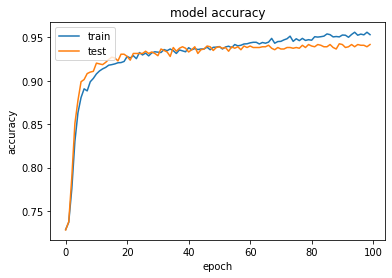

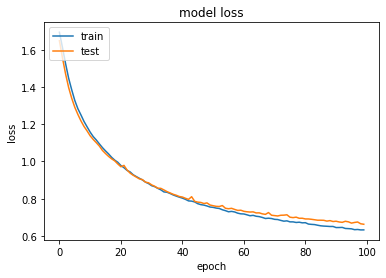

Confusion Matrix
[[280  37]
 [ 31 818]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       317
         1.0       0.96      0.96      0.96       849

    accuracy                           0.94      1166
   macro avg       0.93      0.92      0.93      1166
weighted avg       0.94      0.94      0.94      1166

Accuracy
0.9416809605488851


In [ ]:
plot_accuracy_loss(model3)
get_accuracy_metrics(model3)

# Models comparision
 

1.   model 1 accuracy on test data with **batch size 32** and **dropout of 0.2** at layer 1 is **0.9433962264150944**
2.   model 2 accuracy on test data with **batch size 64** and **dropout of 0.2** at layer 1  is **0.9391080617495712**
3. model 3 accuracy on test data with **batch size 32** and **dropout of 0.4** at layer 2  is **0.9416809605488851**



*   Model1 performace is slighly better than model2 because of the lower batch size. Smaller batch size tends to generalization better hence better accuray on test data.
*   Model3 performance is poor as compared to model1 with same batch size but different dropout value and position. This may be because of higher magniture of dropout tends to increase bias and hence lower accuracy on both train and test data






In [ ]:
get_accuracy_metrics(model1)

Confusion Matrix
[[277  40]
 [ 26 823]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       317
         1.0       0.95      0.97      0.96       849

    accuracy                           0.94      1166
   macro avg       0.93      0.92      0.93      1166
weighted avg       0.94      0.94      0.94      1166

Accuracy
0.9433962264150944


By analysing the classification report of each of the three models, we identify the first model as best performing one. Above is the classification report of that model. As per the precision, recall and f1-score we can say that the model classify PNEUMONIA class better than NORMAL class. 

# Identifying incorrectly classified images

In [ ]:
  Y_pred = model.predict_classes(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32')).reshape((-1,))

In [ ]:
incorrects = np.nonzero(Y_pred != Y_test)

In [ ]:
Y_test_class = list(Y_test[incorrects])

In [ ]:
Y_test_index = list(incorrects[0])

In [ ]:
y_pred_prob = model.predict_proba(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32')).reshape((-1,))

In [ ]:
df = pd.DataFrame(list(zip(Y_test_class,y_pred_prob, Y_test_index)),
               columns =['True_Class_Label', 'Wrongly_Predicted_Class_Prob', "Index"])

In [ ]:
df[df.True_Class_Label==1.0].sort_values(by=['Wrongly_Predicted_Class_Prob'], ascending=False).head()

,True_Class_Label,Wrongly_Predicted_Class_Prob,Index
12,1.0,0.999908,236
56,1.0,0.999769,1029
18,1.0,0.999663,360
62,1.0,0.999642,1154
3,1.0,0.999598,64


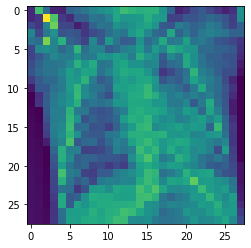

In [ ]:
# The image with Index 258 is wrongly classified as NORMAL with probability 0.999864
pyplot.imshow(X_test[258])


In [ ]:
df[df.True_Class_Label==0.0].sort_values(by=['Wrongly_Predicted_Class_Prob'], ascending=False).head()

,True_Class_Label,Wrongly_Predicted_Class_Prob,Index
7,0.0,0.999933,168
17,0.0,0.999815,321
54,0.0,0.999766,973
24,0.0,0.999533,455
31,0.0,0.999401,577


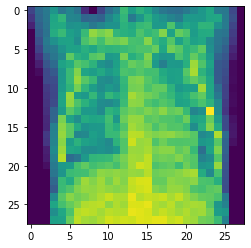

In [ ]:
# The image with Index 109 is wrongly classified by the model as PNEUMONIA with probability 0.999864
pyplot.imshow(X_test[109])